<a href="https://colab.research.google.com/github/ehpub/KFQ_MLDL_2023/blob/main/2023_kfq_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%8F%AC%EC%A7%80%EC%85%98_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

강의 교재 : https://wikibook.co.kr/mymlrev/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = 'https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_stat.csv'

In [ ]:
df = pd.read_csv(path)
df

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5
...,...,...,...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,6.1,10.4,2.8,1.0,1.0
96,Dwyane Wade,SG,0.8,6.2,4.5,3.8,1.4,0.7
97,Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4
98,Hassan Whiteside,C,0.0,7.0,14.1,0.7,0.7,2.1


In [ ]:
data = df.drop(['Player','Pos'],axis=1)
label = df['Pos']

In [ ]:
label.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

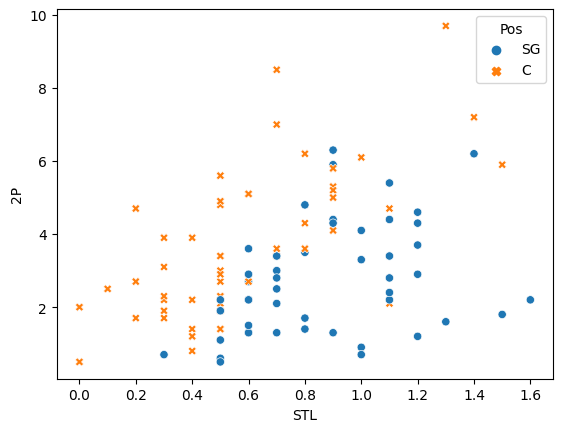

In [ ]:
sns.scatterplot(data=df,
                x='STL',
                y='2P',
                hue='Pos',
                style='Pos')
plt.show()

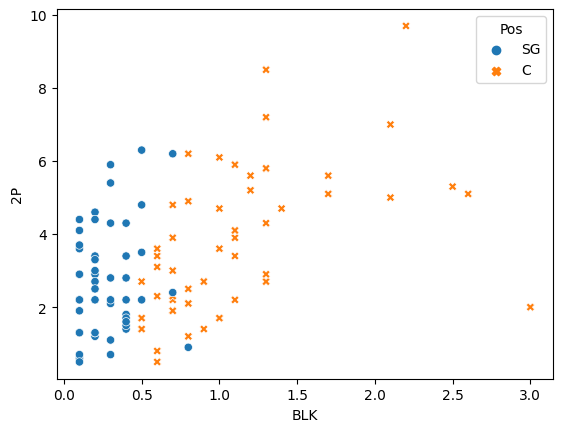

In [ ]:
sns.scatterplot(data=df,
                x='BLK',
                y='2P',
                hue='Pos',
                style='Pos')
plt.show()

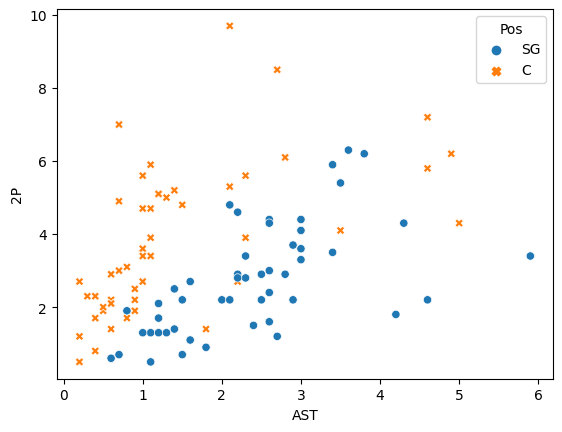

In [ ]:
sns.scatterplot(data=df,
                x='AST',
                y='2P',
                hue='Pos',
                style='Pos')
plt.show()

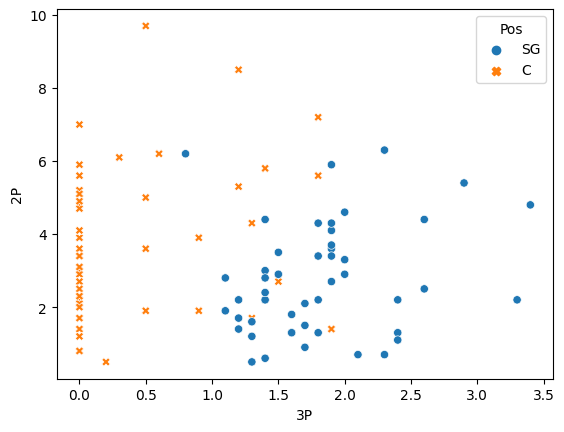

In [ ]:
sns.scatterplot(data=df,
                x='3P',
                y='2P',
                hue='Pos',
                style='Pos')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df['Pos'] = le.fit_transform(df['Pos'])

In [ ]:
df.corr()

<ipython-input-166-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Pos,3P,2P,TRB,AST,STL,BLK
Pos,1.000000,0.787110,-0.290651,-0.628595,0.386874,0.401425,-0.700786
3P,0.787110,1.000000,-0.094914,-0.498036,0.485010,0.353517,-0.534588
2P,-0.290651,-0.094914,1.000000,0.680882,0.396094,0.353558,0.482056
TRB,-0.628595,-0.498036,0.680882,1.000000,0.026689,0.130441,0.707542
AST,0.386874,0.485010,0.396094,0.026689,1.000000,0.640802,-0.148161
STL,0.401425,0.353517,0.353558,0.130441,0.640802,1.000000,-0.138208
BLK,-0.700786,-0.534588,0.482056,0.707542,-0.148161,-0.138208,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data,label)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
mss = []
for k in range(1,40):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  mss.append(round(accuracy_score(y_test,pred),2))
print(mss)

[1.0, 1.0, 1.0, 0.96, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


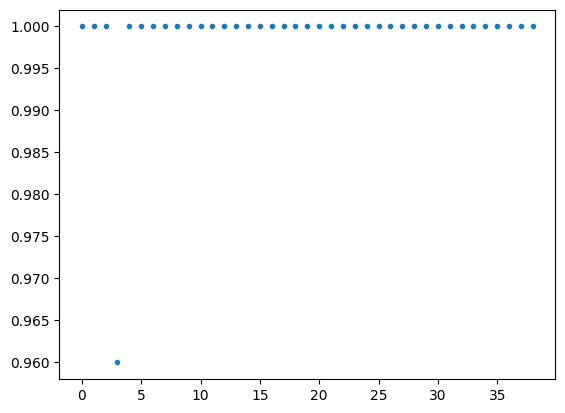

In [ ]:
plt.plot(mss,'.')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
mss = []
for k in range(1,40):
  model = KNeighborsClassifier(n_neighbors=k)
  s = cross_val_score(model,data,label,cv=10)
  mss.append(s.mean())
print(mss)

[0.97, 0.96, 0.95, 0.9400000000000001, 0.9400000000000001, 0.95, 0.93, 0.9400000000000001, 0.9199999999999999, 0.9400000000000001, 0.9199999999999999, 0.93, 0.9199999999999999, 0.93, 0.9199999999999999, 0.93, 0.9199999999999999, 0.93, 0.9199999999999999, 0.9400000000000001, 0.93, 0.93, 0.93, 0.93, 0.9199999999999999, 0.93, 0.93, 0.93, 0.93, 0.93, 0.9099999999999999, 0.9199999999999999, 0.9099999999999999, 0.9199999999999999, 0.9099999999999999, 0.9199999999999999, 0.9099999999999999, 0.9199999999999999, 0.8800000000000001]


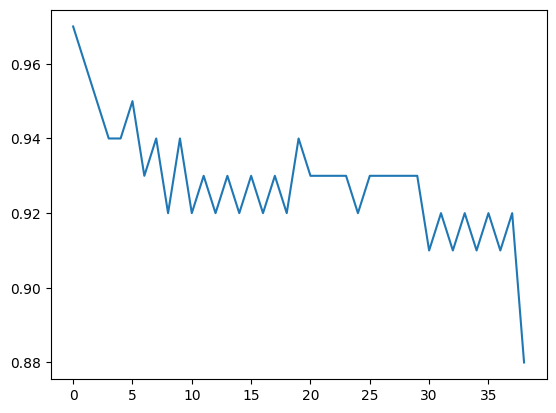

In [ ]:
plt.plot(mss)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
m1 = KNeighborsClassifier()
m2 = LogisticRegression()
m3 = DecisionTreeClassifier()
m4 = RandomForestClassifier()
for model in [m1,m2,m3,m4]:
  print(model.__class__.__name__)
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  print("acc:",accuracy_score(y_test,pred))

KNeighborsClassifier
acc: 1.0
LogisticRegression
acc: 1.0
DecisionTreeClassifier
acc: 0.96
RandomForestClassifier
acc: 0.96


In [ ]:
df.columns

Index(['Player', 'Pos', '3P', '2P', 'TRB', 'AST', 'STL', 'BLK'], dtype='object')

In [ ]:
data2 = df.drop(['Player','Pos','STL','AST','2P'],axis=1)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data2,label)

In [ ]:
m1 = KNeighborsClassifier()
m2 = LogisticRegression()
m3 = DecisionTreeClassifier()
m4 = RandomForestClassifier()
for model in [m1,m2,m3,m4]:
  print(model.__class__.__name__)
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  print("acc:",accuracy_score(y_test,pred))

KNeighborsClassifier
acc: 0.8
LogisticRegression
acc: 0.84
DecisionTreeClassifier
acc: 0.76
RandomForestClassifier
acc: 0.84


In [ ]:
m1 = KNeighborsClassifier()
m2 = LogisticRegression()
m3 = DecisionTreeClassifier()
m4 = RandomForestClassifier()
for model in[m1,m2,m3,m4]:
  print(model.__class__.__name__)
  s = cross_val_score(model,data,label,cv=10)
  print("test1",s.mean())
  s = cross_val_score(model,data2,label,cv=10)
  print("test2",s.mean())

KNeighborsClassifier
test1 0.9400000000000001
test2 0.9
LogisticRegression
test1 0.97
test2 0.9400000000000001
DecisionTreeClassifier
test1 0.93
test2 0.9400000000000001
RandomForestClassifier
test1 0.9700000000000001
test2 0.95


In [ ]:
from sklearn.svm import SVC

In [ ]:
m1 = KNeighborsClassifier()
m2 = LogisticRegression()
m3 = DecisionTreeClassifier()
m4 = RandomForestClassifier()
m5 = SVC()
for model in[m1,m2,m3,m4,m5]:
  print(model.__class__.__name__)
  s = cross_val_score(model,data,label,cv=10)
  print("test1",s.mean())
  s = cross_val_score(model,data2,label,cv=10)
  print("test2",s.mean())

KNeighborsClassifier
test1 0.9400000000000001
test2 0.9
LogisticRegression
test1 0.97
test2 0.9400000000000001
DecisionTreeClassifier
test1 0.93
test2 0.95
RandomForestClassifier
test1 0.9700000000000001
test2 0.95
SVC
test1 0.95
test2 0.9200000000000002


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
data3 = df[['3P','BLK']]
x_train,x_test,y_train,y_test = train_test_split(data3,label)

In [ ]:
params = {
          'C':[0.001,0.01,0.1,1,10,100,1000],
          'gamma':[0.00001,0.0001,0.001,0.01,0.1,1]
}

In [ ]:
model = SVC()
gs = GridSearchCV(model,param_grid=params,cv=10)
gs.fit(x_train,y_train)
print(gs.best_params_)

{'C': 0.1, 'gamma': 1}


In [ ]:
print(gs.best_score_)

0.9464285714285715


In [ ]:
m1 = KNeighborsClassifier()
m2 = LogisticRegression()
m3 = DecisionTreeClassifier()
m4 = RandomForestClassifier()
m5 = SVC(C=100,gamma=0.01)
for model in[m1,m2,m3,m4,m5]:
  print(model.__class__.__name__)
  s = cross_val_score(model,data,label,cv=10)
  print("test1",s.mean())
  s = cross_val_score(model,data2,label,cv=10)
  print("test2",s.mean())

KNeighborsClassifier
test1 0.9400000000000001
test2 0.9
LogisticRegression
test1 0.97
test2 0.9400000000000001
DecisionTreeClassifier
test1 0.9400000000000001
test2 0.95
RandomForestClassifier
test1 0.9700000000000001
test2 0.95
SVC
test1 0.9800000000000001
test2 0.96


In [ ]:
x,y = np.meshgrid(np.linspace(0,4,100),np.linspace(0,4,100))

In [ ]:
x.shape

(100, 100)

In [ ]:
y.shape

(100, 100)

In [ ]:
xy = np.c_[x.ravel(),y.ravel()]
xy

array([[0.        , 0.        ],
       [0.04040404, 0.        ],
       [0.08080808, 0.        ],
       ...,
       [3.91919192, 4.        ],
       [3.95959596, 4.        ],
       [4.        , 4.        ]])

In [ ]:
result = []
for c in [0.01,0.1,1]:
  for g in [0.1,1,10]:
    model = SVC(C=c,gamma=g)
    model.fit(x_train,y_train)
    result.append((c,g,model))

In [ ]:
y_train

1      C
80    SG
91     C
59    SG
27     C
      ..
54     C
43     C
31     C
60     C
2      C
Name: Pos, Length: 75, dtype: object

In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

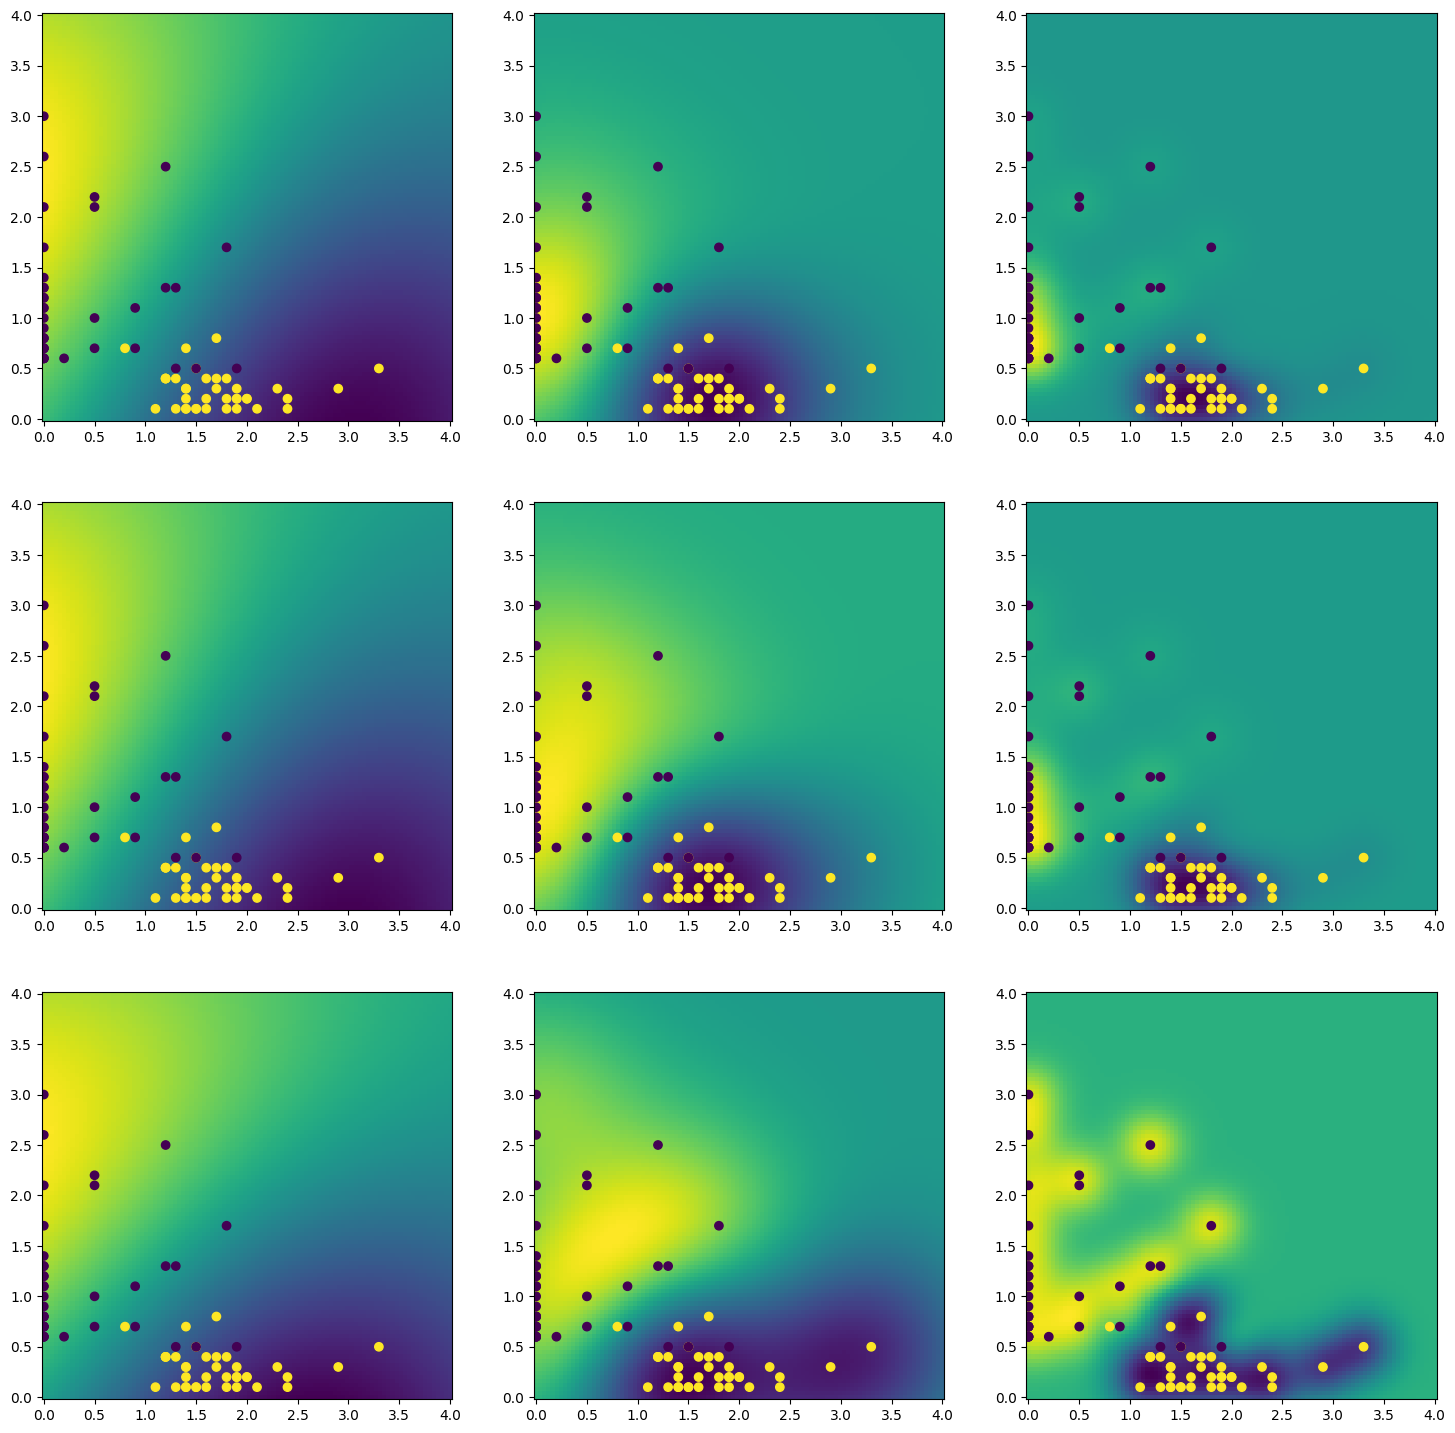

In [ ]:
plt.figure(figsize=(18,18))
for i, (c,g,model) in enumerate(result):
  z = model.decision_function(xy)
  z = z.reshape(x.shape)

  plt.subplot(3,3,i+1)
  plt.pcolormesh(x,y,-z)
  plt.scatter(x_train['3P'],x_train['BLK'],c=y_train)
plt.show()

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
data = iris.data
label = iris.target

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mm = MinMaxScaler()
data2 = mm.fit_transform(data)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data,label)

In [ ]:
m1 = KNeighborsClassifier()
m2 = LogisticRegression()
m3 = DecisionTreeClassifier()
m4 = RandomForestClassifier()
m5 = SVC()
for model in[m1,m2,m3,m4,m5]:
  print(model.__class__.__name__)
  s = cross_val_score(model,data,label,cv=10)
  print("test1",s.mean())
  s = cross_val_score(model,data2,label,cv=10)
  print("test2",s.mean())

KNeighborsClassifier
test1 0.9666666666666668
test2 0.9533333333333334
LogisticRegression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

test1 0.9733333333333334
test2 0.9199999999999999
DecisionTreeClassifier
test1 0.96
test2 0.9533333333333334
RandomForestClassifier
test1 0.96
test2 0.96
SVC
test1 0.9733333333333334
test2 0.9600000000000002


In [ ]:
params = {
          'C':[0.001,0.01,0.1,1,10,100,1000],
          'gamma':[0.00001,0.0001,0.001,0.01,0.1,1]
}

In [ ]:
model = SVC()
gs = GridSearchCV(model,param_grid=params,cv=10)
gs.fit(x_train,y_train)
print(gs.best_params_)

{'C': 100, 'gamma': 0.1}


In [ ]:
print(gs.best_score_)

0.9734848484848484


In [ ]:
model = SVC(C=100,gamma=0.1)
model.fit(x_train,y_train)
pred = model.predict(x_test)
print(accuracy_score(y_test,pred))

0.9736842105263158
